# Webscrapping

## Webscrapping basique avec unique package beautifulsoup

### Installation des packages

In [1]:
!pip install lxml

import pandas as pd
import requests
from bs4 import BeautifulSoup
from pprint import pprint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 83.0 MB/s eta 0:00:00ta 0:00:01


##### Dans un premier temps, on chercher à récupérer des informations sur la communication verte de l'entreprise Pfizer. Pour cela, on test le webscrapping sur différents sites internet : CNN, Europe PMC et Facebook

### CNN 

In [2]:
nom_entreprise = "pfizer"
url = "https://edition.cnn.com/search?q={0}&from=0&size=10&page=1&sort=newest&types=all&section=".format(nom_entreprise)

response = requests.get(url)

if response.status_code == 200:
    # Utilisez response.text pour obtenir le contenu sous forme de chaîne de caractères
    html_content = response.text

    # Utilisez BeautifulSoup avec html_content
    soup = BeautifulSoup(html_content, 'html.parser')
        
else:
    print(f"La requête a échoué avec le code d'état {response.status_code}")

search_results_count_div = soup.find('div', class_='search__results-count')
search_results_count_div


<div class="search__results-count">
<strong id="search__query"></strong>
</div>

##### Conclusion : Aucun texte présent dans la balise recherchée...

### EUROPE PMC

In [3]:
from bs4 import BeautifulSoup
import requests

numero_article = 10677964
url = "https://europepmc.org/article/PMC/PMC{0}".format(numero_article)

response = requests.get(url)

if response.status_code == 200:
    # Utilisez response.text pour obtenir le contenu sous forme de chaîne de caractères
    html_content = response.text

    # Utilisez BeautifulSoup avec html_content
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Récupérez la balise <h2> avec l'attribut id="article--free-full-text--header"
    h2_tag = soup.find('h2', {'id': 'article--free-full-text--header'})
    
    if h2_tag:
        print("Balise <h2> trouvée :", h2_tag.text)
    else:
        print("Balise <h2> non trouvée.")
    
else:
    print(f"La requête a échoué avec le code d'état {response.status_code}")


Balise <h2> non trouvée.


##### Conclusion : On ne trouve pas la basise qui permet d'afficher l'abstract de l'article

### Facebook

In [4]:
from bs4 import BeautifulSoup
import requests

url = "https://www.facebook.com/Pfizer/?locale=fr_FR"

response = requests.get(url)

if response.status_code == 200:
    # Utilisez response.text pour obtenir le contenu sous forme de chaîne de caractères
    html_content = response.text

    # Utilisez BeautifulSoup avec html_content
    soup = BeautifulSoup(html_content, 'html.parser')
    all_post = soup.find_all('div', class_='x1yztbdb x1n2onr6 xh8yej3 x1ja2u2z') 
    
else:
    print(f"La requête a échoué avec le code d'état {response.status_code}")


all_post


[]

##### Conclusion : On ne trouve pas les balises correspondant aux postes

##### Possible problème de la méthode utilisée précedemment : les sites internet recherchés sont dynamiques. Pour résoudre ce problème, on essaye le package selinium.

## Webscrapping avec selinium

### Installation des packages

In [5]:
!sudo apt-get update
!sudo apt install -y unzip xvfb libxi6 libgconf-2-4 -y
!sudo apt install chromium-chromedriver -y
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O /tmp/chrome.deb
!sudo apt-get update
!sudo -E apt-get install -y /tmp/chrome.deb
!pip install chromedriver-autoinstaller selenium

import chromedriver_autoinstaller
chromedriver_autoinstaller.install()


!pip install webdriver_manager

import selenium
from webdriver_manager.chrome import ChromeDriverManager

path_to_web_driver = ChromeDriverManager().install()


import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
#chrome_options.add_argument('--verbose') 


from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
service = Service(executable_path=path_to_web_driver)

browser = webdriver.Chrome(service=service,
                           options=chrome_options)

Get:1 http://archive.ubuntu.com/ubuntu jammy InRelease [270 kB]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]      
Get:3 https://apt.postgresql.org/pub/repos/apt jammy-pgdg InRelease [123 kB]   
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]        
Get:5 https://apt.postgresql.org/pub/repos/apt jammy-pgdg/main amd64 Packages [489 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,600 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy/universe amd64 Packages [17.5 MB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,344 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.6 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,055 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 Packages [266 kB]
Get:13 http://

### CNN 

In [6]:
nom_entreprise = "pfizer"
url = "https://edition.cnn.com/search?q={0}&from=0&size=10&page=1&sort=newest&types=all&section=".format(nom_entreprise)

browser.get(url)

# Obtenez le contenu de la page après que JavaScript ait pu mettre à jour le DOM
html_content = browser.page_source

# Utilisez BeautifulSoup comme précédemment
soup = BeautifulSoup(html_content, 'html.parser')

soup


<html><head></head><body></body></html>

In [7]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

def scrape_cnn_for_pizer(start_year=2010, end_year=2023):
    # Initialiser le navigateur Selenium
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

 
    # Construire l'URL de recherche
    search_url = f"https://edition.cnn.com/search?q=Pfizer+environment"
    driver.get(search_url)

    time.sleep(5)  # Attendre que la page charge

    # Récupérer les titres des articles (ajuster le sélecteur en fonction de la structure de la page)
    articles = driver.find_elements(By.CSS_SELECTOR, 'h3.article-title')

    for article in articles:
        title = article.text
        print(f'{title}')

    time.sleep(2)  # Petite pause pour éviter de surcharger le serveur

    driver.quit()

scrape_cnn_for_pizer()


SessionNotCreatedException: Message: session not created: Chrome failed to start: exited normally.
  (session not created: DevToolsActivePort file doesn't exist)
  (The process started from chrome location /opt/google/chrome/chrome is no longer running, so ChromeDriver is assuming that Chrome has crashed.)
Stacktrace:
#0 0x564488dc3f83 <unknown>
#1 0x564488a7ccf7 <unknown>
#2 0x564488ab460e <unknown>
#3 0x564488ab126e <unknown>
#4 0x564488b0180c <unknown>
#5 0x564488af5e53 <unknown>
#6 0x564488abddd4 <unknown>
#7 0x564488abf1de <unknown>
#8 0x564488d88531 <unknown>
#9 0x564488d8c455 <unknown>
#10 0x564488d74f55 <unknown>
#11 0x564488d8d0ef <unknown>
#12 0x564488d5899f <unknown>
#13 0x564488db1008 <unknown>
#14 0x564488db11d7 <unknown>
#15 0x564488dc3124 <unknown>
#16 0x7fb741616ac3 <unknown>


##### Conclusion : on fait pire qu'avec le package beautiful soup uniquement, on arrive pas à télécharger le code HTML

### Facebook

In [8]:
url = "https://www.facebook.com/Pfizer/?locale=fr_FR"

browser.get(url)

# Obtenez le contenu de la page après que JavaScript ait pu mettre à jour le DOM
html_content = browser.page_source

# Utilisez BeautifulSoup comme précédemment
soup = BeautifulSoup(html_content, 'html.parser')
div_tags = soup.find_all('div', class_='x1yztbdb x1n2onr6 xh8yej3 x1ja2u2z')

div_tags

[]

##### Conclusion : On arrive toujours pas à récupérer les postes

### Europe PMC

In [9]:
numero_article = 10677964
url = "https://europepmc.org/article/PMC/PMC{0}".format(numero_article)

browser.get(url)

# Obtenez le contenu de la page après que JavaScript ait pu mettre à jour le DOM
html_content = browser.page_source

# Utilisez BeautifulSoup comme précédemment
soup = BeautifulSoup(html_content, 'html.parser')
h2_tag = soup.find('h2', {'id': 'article--free-full-text--header'})

if h2_tag:
    print("Balise <h2> trouvée :", h2_tag.text)
else:
    print("Balise <h2> non trouvée.")

Balise <h2> trouvée : 
    Free full text 


##### Conclusion : pas d'amélioration

# Analyse de sentiment

## Dictionnaires

In [10]:
# Créer un dictionnaire de termes environnementaux positifs
dictionnaire_positif = {
    "propre": 1,
    "écologique": 1,
    "durable": 1,
    "vert": 1,
    "économie d'énergie": 1,
    "renouvelable": 1,
    "responsable": 1,
    "conservation": 1,
    "biodiversité": 1,
    "sain": 1,
    "bio": 1,
    "éco-friendly": 1,
    "respectueux de l'environnement": 1,
    "efficace": 1,
    "innovant": 1,
    "éthique": 1,
    "équitable": 1,
    "efficience": 1,
    "responsabilité sociale": 1,
    "sustainable": 1,
    "solidaire": 1,
    "propagation consciente": 1,
    "soutenable": 1,
    "énergie propre": 1,
    "énergie renouvelable": 1,
    "recyclage": 1,
    "efficacité énergétique": 1,
    "économie circulaire": 1,
    "énergie solaire": 1,
    "énergie éolienne": 1,
    "régénération": 1,
    "préservation": 1,
    "restauration": 1,
    "réhabilitation": 1,
    "récupération": 1,
    "restaurateur": 1,
    "régénérateur": 1,
    "revitalisation": 1,
    "positif": 1,
    "bénéfique": 1,
    "valorisation": 1,
    "épanouissement": 1,
    "amélioration continue": 1,
    "prospérité": 1,
    "harmonie": 1,
    "intégrité": 1,
}


dictionnaire_negatif = {
    "pollution": -1,
    "déchet": -1,
    "déforestation": -1,
    "émissions de gaz à effet de serre": -1,
    "contamination": -1,
    "destructeur": -1,
    "irresponsable": -1,
    "gaspillage": -1,
    "nuisible": -1,
    "toxique": -1,
    "détérioration": -1,
    "dégradation": -1,
    "dommageable": -1,
    "préjudiciable": -1,
    "périlleux": -1,
    "inquiétant": -1,
    "catastrophique": -1,
    "catastrophe": -1,
    "dangereux": -1,
    "menace": -1,
    "risque": -1,
    "nocif": -1,
    "néfaste": -1,
    "inadéquat": -1,
    "inapproprié": -1,
    "inopportun": -1,
    "nuire": -1,
    "endommagement": -1,
    "dommages": -1,
    "polluant": -1,
    "polluer": -1,
    "détériorer": -1,
    "perturbation": -1,
    "irrespectueux": -1,
    "malveillant": -1,
    "dégât": -1,
    "agressif": -1,
    "ravageur": -1,
    "gâcher": -1,
    "perturber": -1,
    "endommager": -1,
}

liste_negation = ["pas", "non","jamais", "aucun", "nul", "rien", "personne", "négatif", "sans", "plus", "moins"]

liste_annulation_negation = ["responsable","à l'origine","la source"]

In [11]:
def analyser_phrase(phrase):
    mots = phrase.split()
    score_total = 0
    negation_active = False

    for mot in mots:
        if mot in liste_negation:
            negation_active = not negation_active
        elif mot in dictionnaire_positif:
            if negation_active:
                if mot in liste_annulation_negation:
                    negation_active = False
                else:
                    score_total += dictionnaire_positif[mot] * -1
            else:
                score_total += dictionnaire_positif[mot]
        elif mot in dictionnaire_negatif:
            if negation_active:
                if mot in liste_annulation_negation:
                    negation_active = False
                else:
                    score_total += dictionnaire_negatif[mot] * -1
            else:
                score_total += dictionnaire_negatif[mot]

    if score_total > 0:
        return "La communication est positive pour l'environnement.",score_total
    elif score_total < 0:
        return "La communication est négative pour l'environnement.",score_total
    else:
        return "La communication est neutre pour l'environnement.",score_total

phrase = "Cette entreprise n'est pas responsable de la pollution."
resultat = analyser_phrase(phrase)
resultat



("La communication est neutre pour l'environnement.", 0)

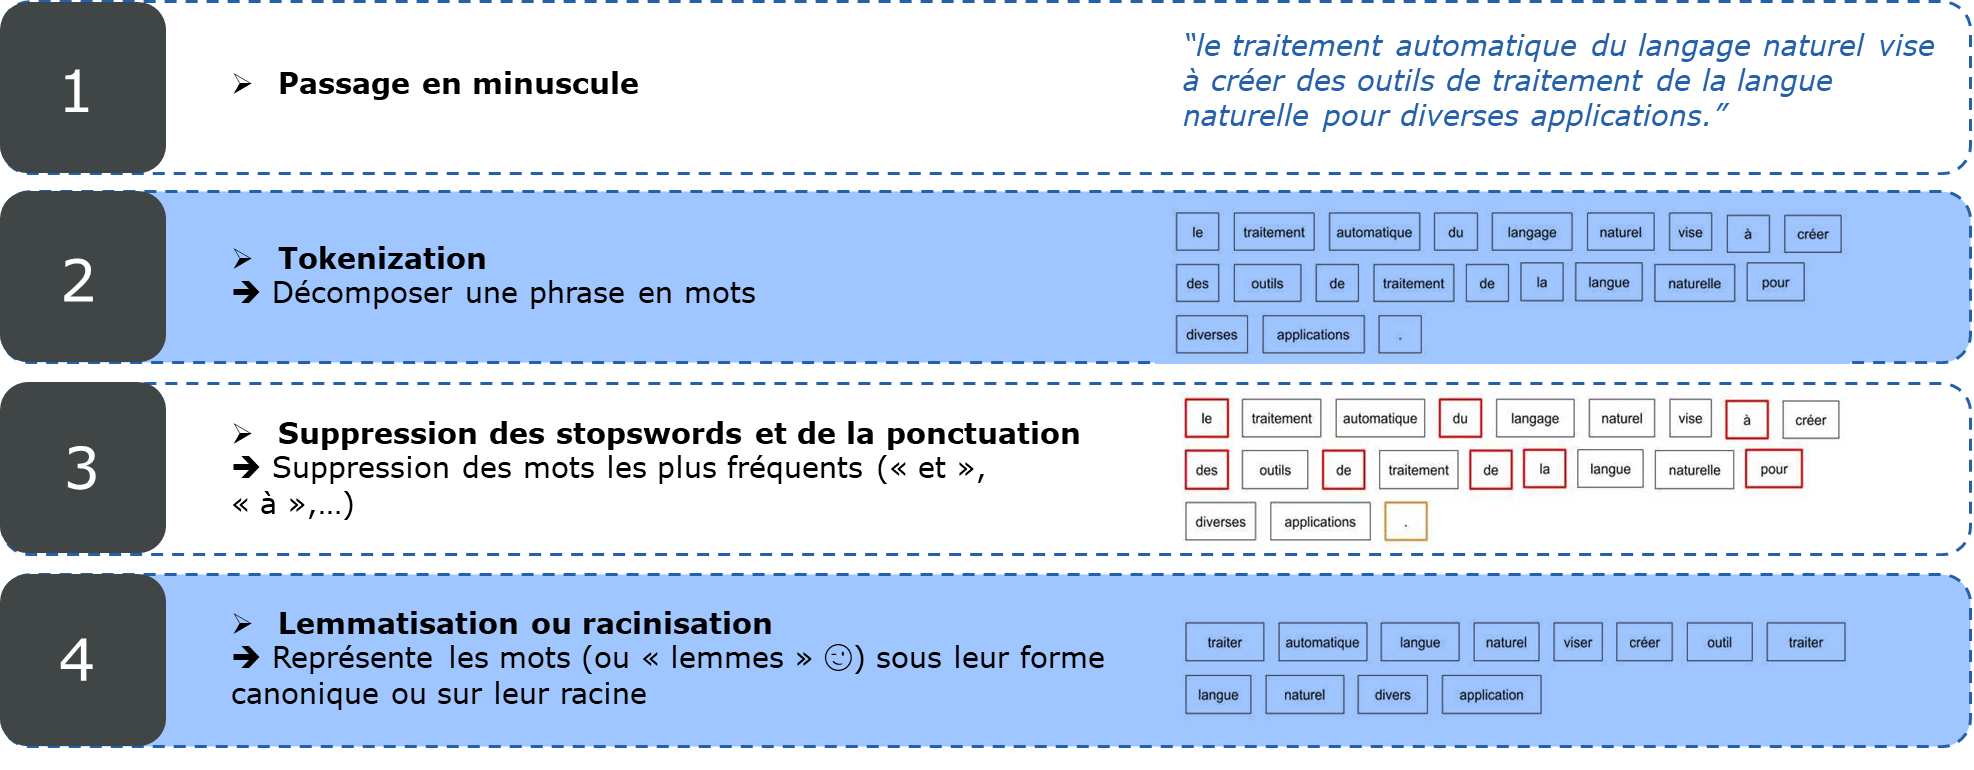

In [12]:
#Version anglaise
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

# Assurez-vous d'avoir téléchargé les ressources nécessaires de NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

# Texte exemple
texte = "The early morning sun cast a golden hue over the sprawling meadows, awakening the slumbering flowers."

# Étape 1: Passage en minuscule
texte_minuscule = texte.lower()

# Étape 2: Tokenization
tokens = word_tokenize(texte_minuscule, language='english')

# Étape 3: Suppression des stopwords et de la ponctuation
stop_words = set(stopwords.words('english') + list(punctuation))
tokens_sans_stopwords = [mot for mot in tokens if mot not in stop_words]

# Étape 4: Lemmatisation
lemmatizer = WordNetLemmatizer()
lemmes = [lemmatizer.lemmatize(mot) for mot in tokens_sans_stopwords]

lemmes


[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/onyxia/nltk_data...
[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /home/onyxia/nltk_data...


['early',
 'morning',
 'sun',
 'cast',
 'golden',
 'hue',
 'sprawling',
 'meadow',
 'awakening',
 'slumbering',
 'flower']

In [17]:
# Version française
!pip install spacy
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS

# Charger le modèle français
nlp = spacy.load('fr_core_news_sm')

# Texte exemple
texte = "Le traitement automatique du langage naturel vise à créer des outils de traitement de la langue naturelle pour diverses applications."

# Étape 1: Passage en minuscule
texte_minuscule = texte.lower()

# Étape 2 et 3: Tokenization et Suppression des stopwords et de la ponctuation
doc = nlp(texte_minuscule)
tokens_sans_stopwords_et_ponctuation = [token.text for token in doc if not token.is_stop and not token.is_punct]

# Étape 4: Lemmatisation
lemmes = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

print(lemmes)

['traitement', 'automatique', 'langage', 'naturel', 'vise', 'créer', 'outil', 'traitement', 'langue', 'naturel', 'application']


In [ ]:
#pip install textblob

In [18]:
!pip install textblob
from textblob import TextBlob

# Exemple de texte
text = "Pfizer pollutes a lot"

# Création d'un objet TextBlob
blob = TextBlob(text)

# Analyse de sentiment
sentiment = blob.sentiment

print(f"Polarité: {sentiment.polarity}, Subjectivité: {sentiment.subjectivity}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 42.2 MB/s eta 0:00:00
Polarité: 0.0, Subjectivité: 0.0


Problème pour l'amélioration du dictionnaire : on ne trouve pas de dictionnaire préexistant avec comme spécialité l'environnement. Deux options : 

 - Améliorer notre dictionnaire fait main:
   - Avantage : On peut contrôler le poid associé à chaque mot, dans la note
   - Inconvéniant : COnstruction peu rigoureuse, on peut avoir oublié des mots
  
 - Utiliser un dictionnaire généraliste :
   - Avantage : Construction plus rigoureuse, moins de chance d'oublier certains termes
   - Inconvénient : Pas de contrôle sur le poid des mots

In [24]:
# On test la seconde option : utilisation d'un dictionnaire généraliste

import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('sentiwordnet')

# Termes à examiner
terms = ["good", "bad", "environment", "technology","greenhouse","gases","greenhouse gas"]

for term in terms:
    # Obtenir les synsets associés au terme
    synsets = list(swn.senti_synsets(term))

    if synsets:
        print(f"Scores de sentiment pour le terme '{term}':")
        for synset in synsets:
            print(f"POS: {synset.pos_score()}, NEG: {synset.neg_score()}, OBJ: {synset.obj_score()}")
        print()
    else:
        print(f"Aucun synset trouvé pour le terme '{term}'.\n")

Scores de sentiment pour le terme 'good':
POS: 0.5, NEG: 0.0, OBJ: 0.5
POS: 0.875, NEG: 0.0, OBJ: 0.125
POS: 0.625, NEG: 0.0, OBJ: 0.375
POS: 0.0, NEG: 0.0, OBJ: 1.0
POS: 0.75, NEG: 0.0, OBJ: 0.25
POS: 0.0, NEG: 0.0, OBJ: 1.0
POS: 1.0, NEG: 0.0, OBJ: 0.0
POS: 1.0, NEG: 0.0, OBJ: 0.0
POS: 0.625, NEG: 0.0, OBJ: 0.375
POS: 1.0, NEG: 0.0, OBJ: 0.0
POS: 0.75, NEG: 0.0, OBJ: 0.25
POS: 0.625, NEG: 0.0, OBJ: 0.375
POS: 0.625, NEG: 0.0, OBJ: 0.375
POS: 0.5, NEG: 0.0, OBJ: 0.5
POS: 0.5, NEG: 0.0, OBJ: 0.5
POS: 0.375, NEG: 0.0, OBJ: 0.625
POS: 0.625, NEG: 0.0, OBJ: 0.375
POS: 0.0, NEG: 0.0, OBJ: 1.0
POS: 0.625, NEG: 0.0, OBJ: 0.375
POS: 0.75, NEG: 0.0, OBJ: 0.25
POS: 0.75, NEG: 0.0, OBJ: 0.25
POS: 0.875, NEG: 0.0, OBJ: 0.125
POS: 0.5, NEG: 0.0, OBJ: 0.5
POS: 0.375, NEG: 0.125, OBJ: 0.5
POS: 0.75, NEG: 0.0, OBJ: 0.25
POS: 0.375, NEG: 0.0, OBJ: 0.625
POS: 0.0, NEG: 0.0, OBJ: 1.0

Scores de sentiment pour le terme 'bad':
POS: 0.0, NEG: 0.875, OBJ: 0.125
POS: 0.0, NEG: 0.625, OBJ: 0.375
POS: 0.25, NE

[nltk_data] Downloading package wordnet to /home/onyxia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/onyxia/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


Analyse : On a l'avantage d'avoir trois notes, qui représentent la part de positivité, de négativité et de neutralité du mot => Avancé par rapport à ce qu'on avait proposé. De plus, on considère qu'il y a plusieurs sens à chaque mot, d'où le fait qu'il y ait plusieurs évaluation pour chaque terme
Avantage ; l'algorithme choisi la note du mot en fonction du contexte ?
Problème : les coefficients ne sont pas forcément bons, par exemple, gases n'est jamais négatif, toujours neutre... pourquoi ?

On test maintenant sur une phrase entière :

In [25]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('punkt')

def get_sentiment_scores(term):
    synsets = list(swn.senti_synsets(term))
    if synsets:
        pos_score = sum(s.pos_score() for s in synsets) / len(synsets)
        neg_score = sum(s.neg_score() for s in synsets) / len(synsets)
        obj_score = sum(s.obj_score() for s in synsets) / len(synsets)

        # Normaliser les scores
        total_score = pos_score + neg_score + obj_score
        if total_score != 0:
            pos_score /= total_score
            neg_score /= total_score
            obj_score /= total_score

        return pos_score, neg_score, obj_score
    else:
        return 0, 0, 0

def analyze_sentence(sentence):
    tokens = word_tokenize(sentence)
    scores = []

    for token in tokens:
        pos_score, neg_score, obj_score = get_sentiment_scores(token)
        scores.append((pos_score, neg_score, obj_score))

    # Calculer les scores moyens pour la phrase
    avg_pos_score = sum(score[0] for score in scores) / len(scores)
    avg_neg_score = sum(score[1] for score in scores) / len(scores)
    avg_obj_score = sum(score[2] for score in scores) / len(scores)

    return avg_pos_score, avg_neg_score, avg_obj_score

# Exemple d'utilisation
phrase = "La technologie propre favorise le développement durable."
score_phrase = analyze_sentence(phrase)
print("Score de la phrase:", score_phrase)

Score de la phrase: (0.015625, 0.046875, 0.3125)


[nltk_data] Downloading package wordnet to /home/onyxia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/onyxia/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
# On test en anglais
phrase = "Clean technology promotes sustainable development."
score_phrase = analyze_sentence(phrase)
print("Score de la phrase:", score_phrase)

Score de la phrase: (0.16182795698924732, 0.020833333333333332, 0.6506720430107527)


Amélioration de notre dictionnaire fait main

In [ ]:
# Dictionnaire de termes environnementaux positifs
dictionnaire_positif = {
    "propre": 1,
    "écologique": 1,
    "durable": 1,
    "vert": 1,
    "économie d'énergie": 1,
    "renouvelable": 1,
    "responsable": 1,
    "conservation": 1,
    "biodiversité": 1,
    "sain": 1,
    "bio": 1,
    "éco-friendly": 1,
    "respectueux de l'environnement": 1,
    "efficace": 1,
    "innovant": 1,
    "éthique": 1,
    "équitable": 1,
    "efficience": 1,
    "responsabilité sociale": 1,
    "sustainable": 1,
    "solidaire": 1,
    "propagation consciente": 1,
    "soutenable": 1,
    "énergie propre": 1,
    "énergie renouvelable": 1,
    "recyclage": 1,
    "efficacité énergétique": 1,
    "économie circulaire": 1,
    "énergie solaire": 1,
    "énergie éolienne": 1,
    "régénération": 1,
    "préservation": 1,
    "restauration": 1,
    "réhabilitation": 1,
    "récupération": 1,
    "restaurateur": 1,
    "régénérateur": 1,
    "revitalisation": 1,
    "positif": 1,
    "bénéfique": 1,
    "valorisation": 1,
    "épanouissement": 1,
    "amélioration continue": 1,
    "prospérité": 1,
    "harmonie": 1,
    "intégrité": 1,
    "consommation responsable": 1,
    "éco-responsable": 1,
    "éco-conscient": 1,
    "durabilité": 1,
    "récupérable": 1,
    "énergie verte": 1,
    "effet de serre": 1,
    "éco-efficace": 1,
    "éco-innovation": 1,
    "bien-être": 1,
    "éco-design": 1,
    "agroécologie": 1,
    "permaculture": 1,
    "éco-citoyen": 1,
    "carbone neutre": 1,
    "zéro déchet": 1,
    "biologique": 1,
    "éco-label": 1,
    "mobilité durable": 1,
    "éco-tourisme": 1,
    "éco-habitat": 1,
    "consommation consciente": 1,
}

# Dictionnaire de termes environnementaux négatifs
dictionnaire_negatif = {
    "pollution": -1,
    "déchet": -1,
    "déforestation": -1,
    "émissions de gaz à effet de serre": -1,
    "contamination": -1,
    "destructeur": -1,
    "irresponsable": -1,
    "gaspillage": -1,
    "nuisible": -1,
    "toxique": -1,
    "détérioration": -1,
    "dégradation": -1,
    "dommageable": -1,
    "préjudiciable": -1,
    "périlleux": -1,
    "inquiétant": -1,
    "catastrophique": -1,
    "catastrophe": -1,
    "dangereux": -1,
    "menace": -1,
    "risque": -1,
    "nocif": -1,
    "néfaste": -1,
    "inadéquat": -1,
    "inapproprié": -1,
    "inopportun": -1,
    "nuire": -1,
    "endommagement": -1,
    "dommages": -1,
    "polluant": -1,
    "polluer": -1,
    "détériorer": -1,
    "perturbation": -1,
    "irrespectueux": -1,
    "malveillant": -1,
    "dégât": -1,
    "agressif": -1,
    "ravageur": -1,
    "gâcher": -1,
    "perturber": -1,
    "endommager": -1,
    "irréparable": -1,
    "toxicité": -1,
    "inacceptable": -1,
    "dommage écologique": -1,
    "abattage illégal": -1,
    "surconsommation": -1,
    "pillage des ressources": -1,
    "dégradation de l'environnement": -1,
    "espace naturel détruit": -1,
    "exploitation excessive": -1,
    "surexploitation": -1,
    "réchauffement climatique": -1,
    "déni environnemental": -1,
}
